In [209]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [210]:
df = pd.read_csv('train.csv')

# EDA

In [211]:
print(df.shape)
print(df.columns)

(31428, 27)
Index(['label', 'id', 'visitTime', 'purchaseTime', 'hour', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'C9', 'N2', 'N3', 'N4', 'N5', 'N6',
       'N7', 'N8', 'N9', 'N10', 'C10', 'C11', 'C12'],
      dtype='object')


In [212]:
df.head()

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,37,19274330,-1,0,2569487005,1830830742,4228834423,652481754,2967512603,...,0,0,0,0,0,0,0,419316267,3617851689,4220791646
1,-1,55,19274334,-1,0,3191875643,403381353,1238330876,652481754,2967512603,...,0,0,0,0,1,0,0,1968545380,3831440054,1213938795
2,-1,114,19274353,-1,0,2634604934,403381353,1928325921,652481754,2967512603,...,0,0,0,0,0,0,0,1405802835,2379633508,1284343215
3,-1,128,19274358,-1,0,2569487005,403381353,296915027,652481754,2967512603,...,0,0,0,0,0,0,0,2299319102,3617851689,4220791646
4,-1,164,19274367,-1,0,2569487005,403381353,681762206,652481754,2967512603,...,0,0,0,0,0,0,0,1306075469,3617851689,4220791646


In [213]:
df.describe()

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
count,31428.000000,31428.000000,3.142800e+04,3.142800e+04,31428.000000,3.142800e+04,3.142800e+04,3.142800e+04,3.142800e+04,3.142800e+04,...,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,3.142800e+04,3.142800e+04,3.142800e+04
mean,-0.996373,321870.448835,1.931855e+07,3.504330e+04,11.799701,2.264373e+09,1.331820e+09,2.255368e+09,1.018468e+09,2.741699e+09,...,0.134307,0.002386,0.027269,0.002164,0.415680,0.042319,0.057560,2.218926e+09,2.939366e+09,2.158890e+09
std,0.085098,184665.780120,1.690395e+04,8.221503e+05,4.695434,1.077516e+09,7.900907e+08,1.125852e+09,7.260969e+08,3.771211e+08,...,1.258795,0.156001,0.562668,0.079745,3.184785,1.008314,1.158253,1.235285e+09,1.020598e+09,1.416777e+09
min,-1.000000,37.000000,1.927433e+07,-1.000000e+00,0.000000,7.942600e+04,4.033814e+08,5.538985e+06,3.063949e+08,2.116767e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.626600e+04,4.393702e+07,2.456084e+08
25%,-1.000000,162636.500000,1.930609e+07,-1.000000e+00,8.000000,1.464958e+09,4.033814e+08,1.408383e+09,6.524818e+08,2.116767e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.140301e+09,2.379634e+09,1.213939e+09
50%,-1.000000,322691.500000,1.931761e+07,-1.000000e+00,12.000000,2.569487e+09,1.235983e+09,2.243934e+09,6.524818e+08,2.967513e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.274128e+09,3.617852e+09,1.284343e+09
75%,-1.000000,481852.000000,1.933113e+07,-1.000000e+00,15.000000,2.834768e+09,2.018710e+09,3.326547e+09,6.524818e+08,2.967513e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.376114e+09,3.831440e+09,4.220792e+09
max,1.000000,638505.000000,1.936054e+07,1.935732e+07,23.000000,4.294924e+09,2.541204e+09,4.292704e+09,2.308171e+09,3.955179e+09,...,20.000000,20.000000,20.000000,10.000000,97.000000,85.000000,86.000000,4.294964e+09,3.831440e+09,4.220792e+09


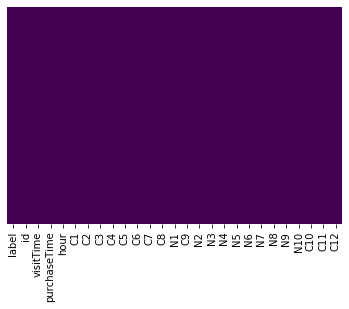

In [214]:
#check for missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No missing values. We now check the class distribution

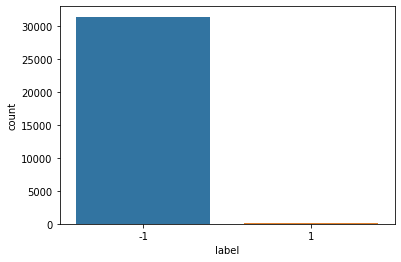

In [215]:
sns.countplot(data=df, x='label')

We have a significant imbalance of classes which we will fix this later by using oversampling of minority classes

Now, we analzye the correlations

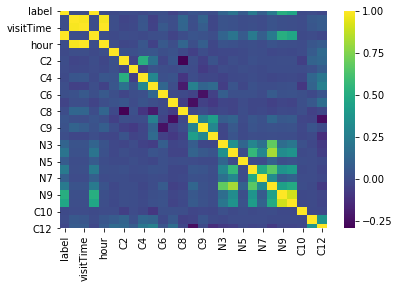

In [216]:
sns.heatmap(df.corr(), cmap = 'viridis')

We can see that visitTime and hour are highly correlated. Therefore, we remove hour and check again

In [217]:
df.drop('hour', axis=1, inplace=True)

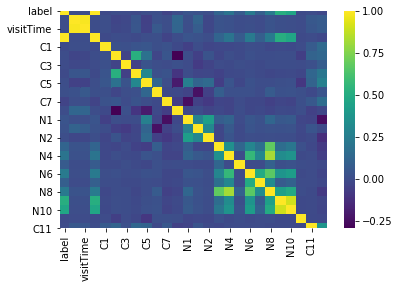

In [218]:
sns.heatmap(df.corr(), cmap = 'viridis')

Now we have no more significant correlations and can continue

# Train test split

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
X = df [['C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'C9', 'N2', 'N3', 'N4', 'N5', 'N6',
       'N7', 'N8', 'N9', 'N10', 'C10', 'C11', 'C12']]
y = df ['label']

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, test_size = 0.33, stratify = y)

Applying SMOTE to oversample minority class

In [222]:
from imblearn.over_sampling import SMOTE

In [223]:
smt = SMOTE(sampling_strategy = 'minority', random_state = 101)
X_train, y_train = smt.fit_resample(X_train, y_train)

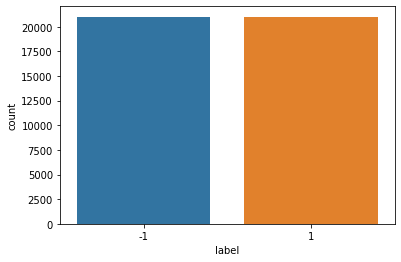

In [224]:
sns.countplot(y_train) # check new distribution

Standardizing features

In [225]:
from sklearn.preprocessing import StandardScaler

In [226]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

# Model 1: Logistic Regression

We search for the best C parameter with Lasso Regularization to avoid overfitting

In [227]:
from sklearn.linear_model import LogisticRegression

In [228]:
C = [10, 1, .1, .001]

In [229]:
for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X_train_std, y_train))
    print('Test accuracy:', clf.score(X_test_std, y_test))
    print('')

//anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C: 10
Training accuracy: 0.5336616233704444
Test accuracy: 0.9935403008098728



//anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C: 1
Training accuracy: 0.5338757255685603
Test accuracy: 0.9936367142306209



//anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C: 0.1
Training accuracy: 0.5455324007993149
Test accuracy: 0.9933474739683764

C: 0.001
Training accuracy: 0.8123513179179751
Test accuracy: 0.9544928654068646



//anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


We can now use the C parameter with the best result (C=0.001) for the training set (because this is already oversampled)

In [245]:
LR_model = LogisticRegression(penalty='l1', C=0.001, solver='liblinear')
LR_model.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [246]:
y_pred_LR = LR_model.predict(X_test)

In [247]:
y_prob_LR = LR_model.predict_proba(X_test)

In [248]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [249]:
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

          -1       1.00      0.97      0.99     10353
           1       0.05      0.84      0.10        19

    accuracy                           0.97     10372
   macro avg       0.53      0.91      0.54     10372
weighted avg       1.00      0.97      0.98     10372



In [250]:
confusion_matrix(y_test, y_pred_LR)

array([[10066,   287],
       [    3,    16]])

In [251]:
roc_auc_score(y_test, y_pred_LR)

0.9071919148784741

# Model 2: Random Forest

In [252]:
from sklearn.ensemble import RandomForestClassifier

In [253]:
RF_model = RandomForestClassifier(n_estimators=60)

In [254]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [255]:
y_pred_RF = RF_model.predict(X_test) # output as class label

In [256]:
y_prob_RF = RF_model.predict_proba(X_test) # output as probability

In [257]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     10353
           1       0.60      0.63      0.62        19

    accuracy                           1.00     10372
   macro avg       0.80      0.82      0.81     10372
weighted avg       1.00      1.00      1.00     10372



In [258]:
roc_auc_score(y_test, y_pred_RF)

0.8154031122430823

We can see that the Logistic REgression model produced the higher AUC score. Therefore, we will use this model to deploy to our testing set.

# Deploying model on Testing Dataset

In [259]:
df_test = pd.read_csv('test1.csv')

In [260]:
df_test.head()

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,1,19360733,-1,0,2569487005,403381353,681762206,652481754,2967512603,...,0,0,0,0,0,0,0,2128770044,3617851689,4220791646
1,-1,2,19360734,-1,0,2416811818,1235983246,3653557526,652481754,2116767313,...,0,0,0,0,0,0,0,4256459078,2379633508,1284343215
2,-1,3,19360735,-1,0,3765056181,1235983246,1310333812,652481754,2116767313,...,0,0,0,0,0,0,0,2840358457,3831440054,1213938795
3,-1,4,19360737,-1,0,955802445,403381353,2290282995,652481754,2967512603,...,0,0,0,0,0,0,0,4039873369,535829057,3828748840
4,-1,5,19360752,-1,0,2569487005,2517724481,2463986301,2308170622,2967512603,...,0,0,0,0,0,0,0,907610626,3617851689,4220791646


In [262]:
#extracting the id as a column (we will need this for the final output)
final_id = df_test ['id'] 

In [263]:
# removing unnecessary features
df_test.drop(labels=['hour','label', 'id', 'visitTime', 'purchaseTime'], axis=1, inplace=True)

In [264]:
df_test.head()

,C1,C2,C3,C4,C5,C6,C7,C8,N1,C9,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,2569487005,403381353,681762206,652481754,2967512603,580883881,2303407174,157533148,0,2088887026,...,0,0,0,0,0,0,0,2128770044,3617851689,4220791646
1,2416811818,1235983246,3653557526,652481754,2116767313,571765677,2303407174,2374954832,0,2226682598,...,0,0,0,0,0,0,0,4256459078,2379633508,1284343215
2,3765056181,1235983246,1310333812,652481754,2116767313,571765677,2303407174,2374954832,0,2226682598,...,0,0,0,0,0,0,0,2840358457,3831440054,1213938795
3,955802445,403381353,2290282995,652481754,2967512603,1607619193,1342367140,3588031319,4,3329757940,...,0,0,0,0,0,0,0,4039873369,535829057,3828748840
4,2569487005,2517724481,2463986301,2308170622,2967512603,580883881,2303407174,157533148,0,2088887026,...,0,0,0,0,0,0,0,907610626,3617851689,4220791646


In [265]:
X_val = df_test # creating our validation test set (features only)

In [266]:
y_val = LR_model.predict_proba(X_val) # creating the predictions (using probabilities)

In [267]:
final_prob = y_val[:,1] #selecting the second column (which is the probability for class 1)

In [268]:
df_test['id'] = final_id

In [269]:
df_test['Prob'] = final_prob

In [270]:
df_test.head()

,C1,C2,C3,C4,C5,C6,C7,C8,N1,C9,...,N6,N7,N8,N9,N10,C10,C11,C12,id,Prob
0,2569487005,403381353,681762206,652481754,2967512603,580883881,2303407174,157533148,0,2088887026,...,0,0,0,0,0,2128770044,3617851689,4220791646,1,0.010773
1,2416811818,1235983246,3653557526,652481754,2116767313,571765677,2303407174,2374954832,0,2226682598,...,0,0,0,0,0,4256459078,2379633508,1284343215,2,0.021468
2,3765056181,1235983246,1310333812,652481754,2116767313,571765677,2303407174,2374954832,0,2226682598,...,0,0,0,0,0,2840358457,3831440054,1213938795,3,0.017276
3,955802445,403381353,2290282995,652481754,2967512603,1607619193,1342367140,3588031319,4,3329757940,...,0,0,0,0,0,4039873369,535829057,3828748840,4,0.487355
4,2569487005,2517724481,2463986301,2308170622,2967512603,580883881,2303407174,157533148,0,2088887026,...,0,0,0,0,0,907610626,3617851689,4220791646,5,0.005451


In [271]:
#selecting only Id and probability columns
df_test = df_test[['id', 'Prob']]

In [272]:
df_test.head()

,id,Prob
0,1,0.010773
1,2,0.021468
2,3,0.017276
3,4,0.487355
4,5,0.005451


In [273]:
#saving output to csv
df_test.to_csv('ValentinFischer_e197412_prediction output.csv', index=False)